# **2.4 Evaluating Hyperparameters**

## **Optimising Weather Prediction Models for Air Ambulance Operations**
This project explores how optimised machine learning models can improve aviation safety forecasting. An air ambulance provider has approached ClimateWins to identify days when flying conditions are safest with the highest possible precision. To support this, I apply hyperparameter searches on Random Forest models, iteratively refining them to achieve peak performance

## Table of Contents  
- [1. Import Libraries](#1-import-libraries)  
- [2. Load Data](#2-load-data)
- [3. Filter for One Decade](#3-filter-for-one-decade)  
- [4. Clean Data](#4-clean-data)  
- [5. Exploratory Data Analysis (EDA)](#5-exploratory-data-analysis-eda)  
- [6. Feature Engineering](#6-feature-engineering)  
- [7. Train/Test Split](#7-train/test-split)  
- [8. Baseline Random Forest](#8-baseline-random-forest)
  - All Weather Stations and Only a Decade of Data
  - Single-Station Full Timeline Dataset
- [9. Optimised Random Forest Evaluation](#9-optimised-random-forest-evaluation)
  - All Weather Stations and Only One Decade
  - Single-Station Full Timeline Dataset
- [10. Feature Importance from Optimised Models](#10-feature-importance-from-optimised-models)
  - All Weather Stations and Only One Decade
  - Single-Station Full Timeline Dataset

---

## 1. Import Libraries

Here’s where I load the Python packages I’ll need:

- Core tools: `pandas`, `numpy`, and `math` for data handling and calculations
- Visualisation: `matplotlib` and `seaborn` for exploratory data analysis and charts
- Machine learning (scikit-learn): `GridSearchCV`, `RandomizedSearchCV`, `StratifiedKFold`, and model evaluation metrics like `accuracy_score`
- Deep learning (Keras): a range of layers (`Dense`, `Dropout`, `Conv1D`, `Conv2D`, `BatchNormalization`, `Flatten`, `MaxPooling1D`), optimisers (`Adam`, `SGD`, `RMSprop`, etc.), callbacks (`EarlyStopping`, `ModelCheckpoint`), and wrappers like `KerasClassifier`
- Advanced optimisation: `BayesianOptimization` for searching hyperparameter spaces more efficiently
- Utilities: `time` for runtime tracking and warnings for cleaner outputs

These libraries provide the full toolkit for experimenting with both deep learning and random forest models, and for running extensive hyperparameter searches to optimise performance.

In [61]:
# Import Libraries 
import pandas as pd
import numpy as np
import seaborn as sns
import os
import operator
import time
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn import datasets  
from sklearn.ensemble import RandomForestClassifier
from numpy import argmax
from sklearn.model_selection import train_test_split
from sklearn import metrics  
from sklearn.tree import plot_tree
from sklearn import tree
from sklearn.model_selection import GridSearchCV
from scipy.stats import randint
from sklearn.model_selection import RandomizedSearchCV

import warnings
warnings.filterwarnings("ignore")
pd.set_option("display.max_columns", None)

---

## 2. Load Data

I’m loading in the cleaned weather observations (`X`) and the target column for whether the day was considered “pleasant” or not (`y`).  
Just checking the shapes and and the first few rows to make sure everything came in clean and looks right.

In [62]:
# Create a path to where my data is stored
path = r'/Users/yaseminmustafa/Desktop/CareerFoundry/Specialisation'

In [63]:
# Load the data
X = pd.read_csv(os.path.join(path, 'Achievement 2', '2.2', 'weather_cleaned.csv'))
y = pd.read_csv(os.path.join(path, 'Achievement 1', '1.4', 'pleasant_weather_answers.csv'))

In [64]:
# Check shape and preview data
print("X shape:", X.shape)
print("y shape:", y.shape)

display(X.head())
display(y.head())

X shape: (22950, 135)
y shape: (22950, 16)


,BASEL_cloud_cover,BASEL_humidity,BASEL_pressure,BASEL_global_radiation,BASEL_precipitation,BASEL_sunshine,BASEL_temp_mean,BASEL_temp_min,BASEL_temp_max,BELGRADE_cloud_cover,BELGRADE_humidity,BELGRADE_pressure,BELGRADE_global_radiation,BELGRADE_precipitation,BELGRADE_sunshine,BELGRADE_temp_mean,BELGRADE_temp_min,BELGRADE_temp_max,BUDAPEST_cloud_cover,BUDAPEST_humidity,BUDAPEST_pressure,BUDAPEST_global_radiation,BUDAPEST_precipitation,BUDAPEST_sunshine,BUDAPEST_temp_mean,BUDAPEST_temp_min,BUDAPEST_temp_max,DEBILT_cloud_cover,DEBILT_humidity,DEBILT_pressure,DEBILT_global_radiation,DEBILT_precipitation,DEBILT_sunshine,DEBILT_temp_mean,DEBILT_temp_min,DEBILT_temp_max,DUSSELDORF_cloud_cover,DUSSELDORF_humidity,DUSSELDORF_pressure,DUSSELDORF_global_radiation,DUSSELDORF_precipitation,DUSSELDORF_sunshine,DUSSELDORF_temp_mean,DUSSELDORF_temp_min,DUSSELDORF_temp_max,HEATHROW_cloud_cover,HEATHROW_humidity,HEATHROW_pressure,HEATHROW_global_radiation,HEATHROW_precipitation,HEATHROW_sunshine,HEATHROW_temp_mean,HEATHROW_temp_min,HEATHROW_temp_max,KASSEL_humidity,KASSEL_pressure,KASSEL_global_radiation,KASSEL_precipitation,KASSEL_sunshine,KASSEL_temp_mean,KASSEL_temp_min,KASSEL_temp_max,LJUBLJANA_cloud_cover,LJUBLJANA_humidity,LJUBLJANA_pressure,LJUBLJANA_global_radiation,LJUBLJANA_precipitation,LJUBLJANA_sunshine,LJUBLJANA_temp_mean,LJUBLJANA_temp_min,LJUBLJANA_temp_max,MAASTRICHT_cloud_cover,MAASTRICHT_humidity,MAASTRICHT_pressure,MAASTRICHT_global_radiation,MAASTRICHT_precipitation,MAASTRICHT_sunshine,MAASTRICHT_temp_mean,MAASTRICHT_temp_min,MAASTRICHT_temp_max,MADRID_cloud_cover,MADRID_humidity,MADRID_pressure,MADRID_global_radiation,MADRID_precipitation,MADRID_sunshine,MADRID_temp_mean,MADRID_temp_min,MADRID_temp_max,MUNCHENB_cloud_cover,MUNCHENB_humidity,MUNCHENB_global_radiation,MUNCHENB_precipitation,MUNCHENB_sunshine,MUNCHENB_temp_mean,MUNCHENB_temp_min,MUNCHENB_temp_max,OSLO_cloud_cover,OSLO_humidity,OSLO_pressure,OSLO_global_radiation,OSLO_precipitation,OSLO_sunshine,OSLO_temp_mean,OSLO_temp_min,OSLO_temp_max,SONNBLICK_cloud_cover,SONNBLICK_humidity,SONNBLICK_pressure,SONNBLICK_global_radiation,SONNBLICK_precipitation,SONNBLICK_sunshine,SONNBLICK_temp_mean,SONNBLICK_temp_min,SONNBLICK_temp_max,STOCKHOLM_cloud_cover,STOCKHOLM_pressure,STOCKHOLM_global_radiation,STOCKHOLM_precipitation,STOCKHOLM_sunshine,STOCKHOLM_temp_mean,STOCKHOLM_temp_min,STOCKHOLM_temp_max,VALENTIA_cloud_cover,VALENTIA_humidity,VALENTIA_pressure,VALENTIA_global_radiation,VALENTIA_precipitation,VALENTIA_sunshine,VALENTIA_temp_mean,VALENTIA_temp_min,VALENTIA_temp_max,KASSEL_cloud_cover,MUNCHENB_pressure,STOCKHOLM_humidity
0,7,0.85,1.018,0.32,0.09,0.7,6.5,0.8,10.9,1,0.81,1.0195,0.88,0.00,7.0,3.7,-0.9,7.9,4,0.67,1.017,0.44,0.01,2.3,2.4,-0.4,5.1,7,0.85,1.0032,0.07,0.25,0.0,9.3,7.4,11.0,8,0.83,1.0161,0.12,0.08,0.0,10.0,7.0,11.5,7,0.91,1.0010,0.13,0.22,0.0,10.6,9.4,8.3,0.82,1.0094,0.28,0.48,1.6,7.9,3.9,9.4,8,1.00,1.0173,0.20,0.00,0.0,-0.6,-1.9,0.5,7,0.83,1.0063,0.22,0.32,1.0,9.5,8.5,11.1,6,0.92,1.0260,0.53,0.0,1.4,7.6,4.4,10.8,5,0.67,0.20,0.10,0.0,6.9,1.1,10.4,8,0.98,0.9978,0.04,1.14,0.0,4.9,3.8,5.9,4,0.73,1.0304,0.48,0.01,2.3,-5.9,-8.5,-3.2,5,1.0114,0.05,0.32,0.0,4.2,2.2,4.9,5,0.88,1.0003,0.45,0.34,4.7,8.5,6.0,10.9,8,1.0304,0.98
1,6,0.84,1.018,0.36,1.05,1.1,6.1,3.3,10.1,6,0.84,1.0172,0.25,0.00,0.0,2.9,2.2,4.4,4,0.67,1.017,0.18,0.31,0.0,2.3,1.4,3.1,8,0.90,1.0056,0.14,0.06,0.1,7.7,6.4,8.3,8,0.89,1.0161,0.18,0.66,0.5,8.2,7.4,11.0,7,0.98,1.0051,0.13,0.23,0.0,6.1,3.9,10.6,0.86,1.0086,0.12,0.27,0.0,7.7,6.8,9.1,6,0.94,1.0173,0.56,0.13,3.2,2.1,-1.3,5.5,8,0.92,1.0062,0.17,1.34,0.4,8.6,7.5,9.9,7,0.86,1.0254,0.46,0.0,0.9,9.8,7.4,12.2,6,0.72,0.61,0.30,5.1,6.2,4.2,10.2,8,0.62,1.0139,0.04,0.00,0.0,3.4,2.8,4.9,6,0.97,1.0292,0.21,0.61,0.0,-9.5,-10.5,-8.5,5,1.0114,0.05,0.06,0.0,4.0,3.0,5.0,7,0.91,1.0007,0.25,0.84,0.7,8.9,5.6,12.1,6,1.0292,0.62
2,8,0.90,1.018,0.18,0.30,0.0,8.5,5.1,9.9,6,0.77,1.0179,0.67,0.00,3.5,3.1,-0.5,6.4,4,0.67,1.017,0.30,0.00,0.6,2.7,1.7,5.3,6,0.92,1.0165,0.28,0.0

,DATE,BASEL_pleasant_weather,BELGRADE_pleasant_weather,BUDAPEST_pleasant_weather,DEBILT_pleasant_weather,DUSSELDORF_pleasant_weather,HEATHROW_pleasant_weather,KASSEL_pleasant_weather,LJUBLJANA_pleasant_weather,MAASTRICHT_pleasant_weather,MADRID_pleasant_weather,MUNCHENB_pleasant_weather,OSLO_pleasant_weather,SONNBLICK_pleasant_weather,STOCKHOLM_pleasant_weather,VALENTIA_pleasant_weather
0,19600101,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,19600102,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,19600103,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,19600104,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,19600105,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


---

## 3. Filter for One Decade

In the previous exercise, I dropped the DATE column from the dataset to simplify the features, since the random forest model doesn’t require explicit date information. However, because the data was already ordered chronologically, I can still approximate a single decade by taking the first 3,653 rows of the dataset. This matches the assignment hint for one decade (X = (3653, 135) and y = (3653)). Selecting this subset ensures the model trains on a consistent time period without needing the date column, which keeps the workflow straightforward while meeting the assignment requirements.

In [65]:
# Take first 3653 rows (approx. one decade)
X = X.iloc[:3653, :]
y = y.iloc[:3653, :]

# Check shapes
print("Shapes after selecting one decade:")
print("X shape:", X.shape)
print("y shape:", y.shape)

Shapes after selecting one decade:
X shape: (3653, 135)
y shape: (3653, 16)


---

## 4. Clean Data

The dataset had already undergone initial cleaning; however, I will perform a quick check for any missing values or duplicate rows to ensure data integrity. I will also review the column names to confirm there are no unusual characters or extra spaces that might cause issues during processing. Additionally, since the date column is present in the y DataFrame and is not required for modelling, I will remove it.

In [66]:
# Data Cleaning

# Check for missing values
print("Missing values in X:")
print(X.isnull().sum().sum())

print("\nMissing values in y:")
print(y.isnull().sum().sum())

# Check for duplicates
print("\nDuplicate rows in X:", X.duplicated().sum())
print("Duplicate rows in y:", y.duplicated().sum())

# Check column names
print("\nFirst 5 column names in X:")
print(X.columns[:5])

Missing values in X:
0

Missing values in y:
0

Duplicate rows in X: 0
Duplicate rows in y: 0

First 5 column names in X:
Index(['BASEL_cloud_cover', 'BASEL_humidity', 'BASEL_pressure',
       'BASEL_global_radiation', 'BASEL_precipitation'],
      dtype='object')


In [67]:
# Drop the 'date' column
y = y.drop(columns=['DATE'])

In [68]:
# Check shape and preview data
print("X shape:", X.shape)
print("y shape:", y.shape)

display(X.head())
display(y.head())

X shape: (3653, 135)
y shape: (3653, 15)


,BASEL_cloud_cover,BASEL_humidity,BASEL_pressure,BASEL_global_radiation,BASEL_precipitation,BASEL_sunshine,BASEL_temp_mean,BASEL_temp_min,BASEL_temp_max,BELGRADE_cloud_cover,BELGRADE_humidity,BELGRADE_pressure,BELGRADE_global_radiation,BELGRADE_precipitation,BELGRADE_sunshine,BELGRADE_temp_mean,BELGRADE_temp_min,BELGRADE_temp_max,BUDAPEST_cloud_cover,BUDAPEST_humidity,BUDAPEST_pressure,BUDAPEST_global_radiation,BUDAPEST_precipitation,BUDAPEST_sunshine,BUDAPEST_temp_mean,BUDAPEST_temp_min,BUDAPEST_temp_max,DEBILT_cloud_cover,DEBILT_humidity,DEBILT_pressure,DEBILT_global_radiation,DEBILT_precipitation,DEBILT_sunshine,DEBILT_temp_mean,DEBILT_temp_min,DEBILT_temp_max,DUSSELDORF_cloud_cover,DUSSELDORF_humidity,DUSSELDORF_pressure,DUSSELDORF_global_radiation,DUSSELDORF_precipitation,DUSSELDORF_sunshine,DUSSELDORF_temp_mean,DUSSELDORF_temp_min,DUSSELDORF_temp_max,HEATHROW_cloud_cover,HEATHROW_humidity,HEATHROW_pressure,HEATHROW_global_radiation,HEATHROW_precipitation,HEATHROW_sunshine,HEATHROW_temp_mean,HEATHROW_temp_min,HEATHROW_temp_max,KASSEL_humidity,KASSEL_pressure,KASSEL_global_radiation,KASSEL_precipitation,KASSEL_sunshine,KASSEL_temp_mean,KASSEL_temp_min,KASSEL_temp_max,LJUBLJANA_cloud_cover,LJUBLJANA_humidity,LJUBLJANA_pressure,LJUBLJANA_global_radiation,LJUBLJANA_precipitation,LJUBLJANA_sunshine,LJUBLJANA_temp_mean,LJUBLJANA_temp_min,LJUBLJANA_temp_max,MAASTRICHT_cloud_cover,MAASTRICHT_humidity,MAASTRICHT_pressure,MAASTRICHT_global_radiation,MAASTRICHT_precipitation,MAASTRICHT_sunshine,MAASTRICHT_temp_mean,MAASTRICHT_temp_min,MAASTRICHT_temp_max,MADRID_cloud_cover,MADRID_humidity,MADRID_pressure,MADRID_global_radiation,MADRID_precipitation,MADRID_sunshine,MADRID_temp_mean,MADRID_temp_min,MADRID_temp_max,MUNCHENB_cloud_cover,MUNCHENB_humidity,MUNCHENB_global_radiation,MUNCHENB_precipitation,MUNCHENB_sunshine,MUNCHENB_temp_mean,MUNCHENB_temp_min,MUNCHENB_temp_max,OSLO_cloud_cover,OSLO_humidity,OSLO_pressure,OSLO_global_radiation,OSLO_precipitation,OSLO_sunshine,OSLO_temp_mean,OSLO_temp_min,OSLO_temp_max,SONNBLICK_cloud_cover,SONNBLICK_humidity,SONNBLICK_pressure,SONNBLICK_global_radiation,SONNBLICK_precipitation,SONNBLICK_sunshine,SONNBLICK_temp_mean,SONNBLICK_temp_min,SONNBLICK_temp_max,STOCKHOLM_cloud_cover,STOCKHOLM_pressure,STOCKHOLM_global_radiation,STOCKHOLM_precipitation,STOCKHOLM_sunshine,STOCKHOLM_temp_mean,STOCKHOLM_temp_min,STOCKHOLM_temp_max,VALENTIA_cloud_cover,VALENTIA_humidity,VALENTIA_pressure,VALENTIA_global_radiation,VALENTIA_precipitation,VALENTIA_sunshine,VALENTIA_temp_mean,VALENTIA_temp_min,VALENTIA_temp_max,KASSEL_cloud_cover,MUNCHENB_pressure,STOCKHOLM_humidity
0,7,0.85,1.018,0.32,0.09,0.7,6.5,0.8,10.9,1,0.81,1.0195,0.88,0.00,7.0,3.7,-0.9,7.9,4,0.67,1.017,0.44,0.01,2.3,2.4,-0.4,5.1,7,0.85,1.0032,0.07,0.25,0.0,9.3,7.4,11.0,8,0.83,1.0161,0.12,0.08,0.0,10.0,7.0,11.5,7,0.91,1.0010,0.13,0.22,0.0,10.6,9.4,8.3,0.82,1.0094,0.28,0.48,1.6,7.9,3.9,9.4,8,1.00,1.0173,0.20,0.00,0.0,-0.6,-1.9,0.5,7,0.83,1.0063,0.22,0.32,1.0,9.5,8.5,11.1,6,0.92,1.0260,0.53,0.0,1.4,7.6,4.4,10.8,5,0.67,0.20,0.10,0.0,6.9,1.1,10.4,8,0.98,0.9978,0.04,1.14,0.0,4.9,3.8,5.9,4,0.73,1.0304,0.48,0.01,2.3,-5.9,-8.5,-3.2,5,1.0114,0.05,0.32,0.0,4.2,2.2,4.9,5,0.88,1.0003,0.45,0.34,4.7,8.5,6.0,10.9,8,1.0304,0.98
1,6,0.84,1.018,0.36,1.05,1.1,6.1,3.3,10.1,6,0.84,1.0172,0.25,0.00,0.0,2.9,2.2,4.4,4,0.67,1.017,0.18,0.31,0.0,2.3,1.4,3.1,8,0.90,1.0056,0.14,0.06,0.1,7.7,6.4,8.3,8,0.89,1.0161,0.18,0.66,0.5,8.2,7.4,11.0,7,0.98,1.0051,0.13,0.23,0.0,6.1,3.9,10.6,0.86,1.0086,0.12,0.27,0.0,7.7,6.8,9.1,6,0.94,1.0173,0.56,0.13,3.2,2.1,-1.3,5.5,8,0.92,1.0062,0.17,1.34,0.4,8.6,7.5,9.9,7,0.86,1.0254,0.46,0.0,0.9,9.8,7.4,12.2,6,0.72,0.61,0.30,5.1,6.2,4.2,10.2,8,0.62,1.0139,0.04,0.00,0.0,3.4,2.8,4.9,6,0.97,1.0292,0.21,0.61,0.0,-9.5,-10.5,-8.5,5,1.0114,0.05,0.06,0.0,4.0,3.0,5.0,7,0.91,1.0007,0.25,0.84,0.7,8.9,5.6,12.1,6,1.0292,0.62
2,8,0.90,1.018,0.18,0.30,0.0,8.5,5.1,9.9,6,0.77,1.0179,0.67,0.00,3.5,3.1,-0.5,6.4,4,0.67,1.017,0.30,0.00,0.6,2.7,1.7,5.3,6,0.92,1.0165,0.28,0.0

,BASEL_pleasant_weather,BELGRADE_pleasant_weather,BUDAPEST_pleasant_weather,DEBILT_pleasant_weather,DUSSELDORF_pleasant_weather,HEATHROW_pleasant_weather,KASSEL_pleasant_weather,LJUBLJANA_pleasant_weather,MAASTRICHT_pleasant_weather,MADRID_pleasant_weather,MUNCHENB_pleasant_weather,OSLO_pleasant_weather,SONNBLICK_pleasant_weather,STOCKHOLM_pleasant_weather,VALENTIA_pleasant_weather
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


---

## 5. Exploratory Data Analysis (EDA)

I will observe some simple statistics to understand the distribution and range of each feature, keeping an eye out for unusual values or potential outliers before moving into modelling.

In [69]:
# Descriptive stats
X.describe()

,BASEL_cloud_cover,BASEL_humidity,BASEL_pressure,BASEL_global_radiation,BASEL_precipitation,BASEL_sunshine,BASEL_temp_mean,BASEL_temp_min,BASEL_temp_max,BELGRADE_cloud_cover,BELGRADE_humidity,BELGRADE_pressure,BELGRADE_global_radiation,BELGRADE_precipitation,BELGRADE_sunshine,BELGRADE_temp_mean,BELGRADE_temp_min,BELGRADE_temp_max,BUDAPEST_cloud_cover,BUDAPEST_humidity,BUDAPEST_pressure,BUDAPEST_global_radiation,BUDAPEST_precipitation,BUDAPEST_sunshine,BUDAPEST_temp_mean,BUDAPEST_temp_min,BUDAPEST_temp_max,DEBILT_cloud_cover,DEBILT_humidity,DEBILT_pressure,DEBILT_global_radiation,DEBILT_precipitation,DEBILT_sunshine,DEBILT_temp_mean,DEBILT_temp_min,DEBILT_temp_max,DUSSELDORF_cloud_cover,DUSSELDORF_humidity,DUSSELDORF_pressure,DUSSELDORF_global_radiation,DUSSELDORF_precipitation,DUSSELDORF_sunshine,DUSSELDORF_temp_mean,DUSSELDORF_temp_min,DUSSELDORF_temp_max,HEATHROW_cloud_cover,HEATHROW_humidity,HEATHROW_pressure,HEATHROW_global_radiation,HEATHROW_precipitation,HEATHROW_sunshine,HEATHROW_temp_mean,HEATHROW_temp_min,HEATHROW_temp_max,KASSEL_humidity,KASSEL_pressure,KASSEL_global_radiation,KASSEL_precipitation,KASSEL_sunshine,KASSEL_temp_mean,KASSEL_temp_min,KASSEL_temp_max,LJUBLJANA_cloud_cover,LJUBLJANA_humidity,LJUBLJANA_pressure,LJUBLJANA_global_radiation,LJUBLJANA_precipitation,LJUBLJANA_sunshine,LJUBLJANA_temp_mean,LJUBLJANA_temp_min,LJUBLJANA_temp_max,MAASTRICHT_cloud_cover,MAASTRICHT_humidity,MAASTRICHT_pressure,MAASTRICHT_global_radiation,MAASTRICHT_precipitation,MAASTRICHT_sunshine,MAASTRICHT_temp_mean,MAASTRICHT_temp_min,MAASTRICHT_temp_max,MADRID_cloud_cover,MADRID_humidity,MADRID_pressure,MADRID_global_radiation,MADRID_precipitation,MADRID_sunshine,MADRID_temp_mean,MADRID_temp_min,MADRID_temp_max,MUNCHENB_cloud_cover,MUNCHENB_humidity,MUNCHENB_global_radiation,MUNCHENB_precipitation,MUNCHENB_sunshine,MUNCHENB_temp_mean,MUNCHENB_temp_min,MUNCHENB_temp_max,OSLO_cloud_cover,OSLO_humidity,OSLO_pressure,OSLO_global_radiation,OSLO_precipitation,OSLO_sunshine,OSLO_temp_mean,OSLO_temp_min,OSLO_temp_max,SONNBLICK_cloud_cover,SONNBLICK_humidity,SONNBLICK_pressure,SONNBLICK_global_radiation,SONNBLICK_precipitation,SONNBLICK_sunshine,SONNBLICK_temp_mean,SONNBLICK_temp_min,SONNBLICK_temp_max,STOCKHOLM_cloud_cover,STOCKHOLM_pressure,STOCKHOLM_global_radiation,STOCKHOLM_precipitation,STOCKHOLM_sunshine,STOCKHOLM_temp_mean,STOCKHOLM_temp_min,STOCKHOLM_temp_max,VALENTIA_cloud_cover,VALENTIA_humidity,VALENTIA_pressure,VALENTIA_global_radiation,VALENTIA_precipitation,VALENTIA_sunshine,VALENTIA_temp_mean,VALENTIA_temp_min,VALENTIA_temp_max,KASSEL_cloud_cover,MUNCHENB_pressure,STOCKHOLM_humidity
count,3653.000000,3653.000000,3.653000e+03,3653.000000,3653.000000,3653.000000,3653.000000,3653.000000,3653.000000,3653.000000,3653.000000,3653.000000,3653.000000,3653.000000,3653.000000,3653.000000,3653.000000,3653.000000,3653.0,3.653000e+03,3.653000e+03,3653.000000,3653.000000,3653.000000,3653.000000,3653.000000,3653.000000,3653.000000,3653.000000,3653.000000,3653.000000,3653.000000,3653.000000,3653.000000,3653.000000,3653.000000,3653.000000,3653.000000,3653.000000,3653.000000,3653.000000,3653.000000,3653.000000,3653.000000,3653.000000,3653.000000,3653.000000,3653.000000,3653.000000,3653.000000,3653.000000,3653.000000,3653.000000,3653.000000,3653.000000,3653.000000,3653.000000,3653.000000,3653.000000,3653.000000,3653.000000,3653.000000,3653.000000,3653.000000,3653.000000,3653.000000,3653.000000,3653.000000,3653.000000,3653.000000,3653.000000,3653.000000,3653.000000,3653.000000,3653.000000,3653.000000,3653.000000,3653.000000,3653.000000,3653.000000,3653.000000,3653.000000,3653.000000,3653.000000,3653.000000,3653.000000,3653.000000,3653.000000,3653.000000,3653.000000,3653.000000,3653.000000,3653.000000,3653.000000,3653.000000,3653.000000,3653.000000,3653.000000,3653.000000,3653.000000,3653.000000,3653.000000,3653.000000,3653.000000,3653.000000,3653.000000,3653.000000,3653.000000,3653.000000,3653.000000,3653.000000,3653.000000,3653.000000,3653.000

---

## 6. Feature Engineering

Since y contains 15 columns — one for each city’s “pleasant day” label — it represents a multi-output target. Random Forests in scikit-learn can handle multi-output classification directly, so I don’t need to flatten y; keeping it as a 2D array preserves the structure of one target per city. Flattening would collapse all columns into a single vector, which would lose the city-specific labels and make modelling incorrect.

---

## 7. Train/Test Split

Dividing the dataset into an 80/20 split allows the model to learn from the training portion and be evaluated on unseen test data. Using random_state=42 ensures the split is reproducible each time the code runs.

In [70]:
# Check input shapes
print(f"Features shape: {X.shape}")
print(f"Target shape: {y.shape}")

# Perform the 80/20 split (no stratify for multi-output)
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,        # 20% for testing
    random_state=42       # reproducible split
)

# Confirm split sizes
print(f"Training set: {X_train.shape}, {y_train.shape}")
print(f"Test set: {X_test.shape}, {y_test.shape}")

Features shape: (3653, 135)
Target shape: (3653, 15)
Training set: (2922, 135), (2922, 15)
Test set: (731, 135), (731, 15)


Because y has multiple columns (one per city), I didn't use stratify, and random_state=42 ensures the split is consistent each time. The shapes confirm the split worked as expected.

---

## 8. Baseline Random Forest
In this section, I will train baseline Random Forest models to establish a reference point for model performance before any hyperparameter tuning. 

I will consider two scenarios:
1. All weather stations using only the first decade of data.
 - This helps me to understand overall patterns and variable importance across multiple stations.
2. A single weather station (Basel) using the full timeline of data.
 - This allows me to assess how a focused dataset for one location performs over time.

In both cases, I first train a default Random Forest to calculate baseline accuracy, then perform a hyperparameter search using RandomizedSearchCV to identify optimal parameters.

Finally, I visualise a single decision tree from the optimised model to examine feature splits.

### All Weather Stations and Only a Decade of Data

In [71]:
# Create a default Random Forest model with fixed random_state
# (random_state ensures reproducibility of results)
rf_base = RandomForestClassifier(random_state=42)

# Fit the baseline model to the training data
rf_base.fit(X_train, y_train)

# Use the fitted model to predict on the test set
y_pred_base = rf_base.predict(X_test)

# Evaluate the baseline accuracy
# This provides a benchmark to compare with optimised models later
print("Baseline Accuracy:", metrics.accuracy_score(y_test, y_pred_base))

Baseline Accuracy: 0.6019151846785226


In [72]:
# Define a parameter distribution to explore.
# Recommended hyperparameters:
# - n_estimators: number of trees
# - max_depth: maximum depth of each tree
# - max_features: number of features considered at each split
# - criterion: function to measure the quality of a split
# - min_samples_leaf: minimum samples required at a leaf node
# - min_samples_split: minimum samples required to split an internal node
param_dist = {
    'n_estimators': [50, 100],                # number of trees
    'max_depth': [5, 10, None],               # depth of trees
    'max_features': ['sqrt', 'log2'],         # features considered per split
    'criterion': ['gini', 'entropy'],         # split quality metric
    'min_samples_leaf': [1, 2, 4],            # minimum samples at leaf
    'min_samples_split': [2, 5, 10]           # minimum samples to split
}

# Initialise a new Random Forest model
rf = RandomForestClassifier(random_state=42)

# Use RandomizedSearchCV to try different hyperparameter combinations.
# - n_iter=5: only test 5 random combinations (small test run)
# - cv=3: 3-fold cross-validation to validate performance
# - n_jobs=-1: use all CPU cores for faster computation
rand_search = RandomizedSearchCV(
    rf, param_distributions=param_dist, 
    n_iter=5, cv=3, random_state=42, n_jobs=-1
)

# Fit the randomised search on the training data
rand_search.fit(X_train, y_train)

# Print out the best hyperparameters found
print("Best Params:", rand_search.best_params_)

Best Params: {'n_estimators': 100, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_features': 'log2', 'max_depth': None, 'criterion': 'entropy'}


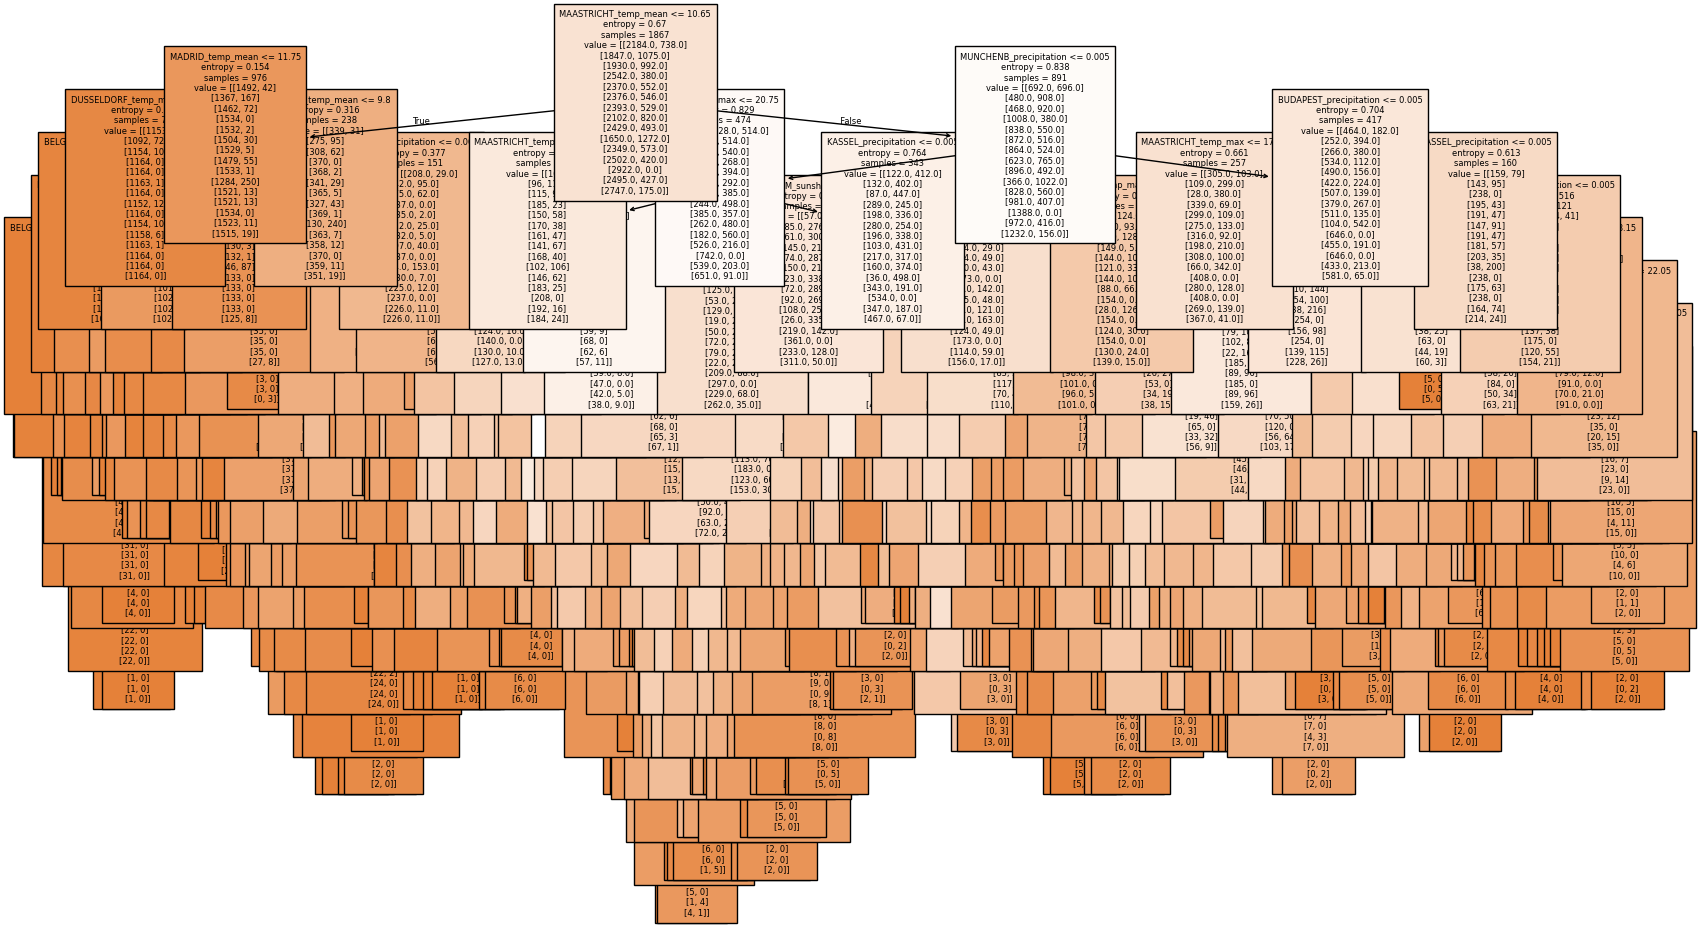

In [73]:
# Plot and save decision tree
# Visualise the first tree from the optimised Random Forest
# Note: Random Forest is an ensemble of many trees, so I only plot one.
plt.figure(figsize=(20,10))
plot_tree(rand_search.best_estimator_.estimators_[0], 
          feature_names=X.columns, 
          filled=True, fontsize=6)

# Save the tree visualisation as a PNG file
plt.savefig("optimized_tree.png", dpi=300)

### Single-Station Full Timeline Dataset

In [74]:
# Check X column names
print(X.columns)

Index(['BASEL_cloud_cover', 'BASEL_humidity', 'BASEL_pressure',
       'BASEL_global_radiation', 'BASEL_precipitation', 'BASEL_sunshine',
       'BASEL_temp_mean', 'BASEL_temp_min', 'BASEL_temp_max',
       'BELGRADE_cloud_cover',
       ...
       'VALENTIA_pressure', 'VALENTIA_global_radiation',
       'VALENTIA_precipitation', 'VALENTIA_sunshine', 'VALENTIA_temp_mean',
       'VALENTIA_temp_min', 'VALENTIA_temp_max', 'KASSEL_cloud_cover',
       'MUNCHENB_pressure', 'STOCKHOLM_humidity'],
      dtype='object', length=135)


In [75]:
# Check y column names
print(y.columns)

Index(['BASEL_pleasant_weather', 'BELGRADE_pleasant_weather',
       'BUDAPEST_pleasant_weather', 'DEBILT_pleasant_weather',
       'DUSSELDORF_pleasant_weather', 'HEATHROW_pleasant_weather',
       'KASSEL_pleasant_weather', 'LJUBLJANA_pleasant_weather',
       'MAASTRICHT_pleasant_weather', 'MADRID_pleasant_weather',
       'MUNCHENB_pleasant_weather', 'OSLO_pleasant_weather',
       'SONNBLICK_pleasant_weather', 'STOCKHOLM_pleasant_weather',
       'VALENTIA_pleasant_weather'],
      dtype='object')


In [76]:
# Prepare single-station full timeline dataset (Basel) 
# Select all Basel weather feature columns (all columns starting with 'BASEL_')
X_single = X[[col for col in X.columns if col.startswith('BASEL_')]]

# Select corresponding target column for Basel
y_single = y[['BASEL_pleasant_weather']]

# Check shapes
print("X_single shape:", X_single.shape)
print("y_single shape:", y_single.shape)

X_single shape: (3653, 9)
y_single shape: (3653, 1)


In [77]:
# Split data into training and test sets
# Use 80/20 split
X_train_single, X_test_single, y_train_single, y_test_single = train_test_split(
    X_single, y_single,
    test_size=0.2,
    random_state=42
)

print(f"Training set: {X_train_single.shape}, {y_train_single.shape}")
print(f"Test set: {X_test_single.shape}, {y_test_single.shape}")

Training set: (2922, 9), (2922, 1)
Test set: (731, 9), (731, 1)


In [78]:
# Run baseline random forest
rf_base_single = RandomForestClassifier(random_state=42)
rf_base_single.fit(X_train_single, y_train_single)
y_pred_base_single = rf_base_single.predict(X_test_single)

# Evaluate baseline accuracy
print("Baseline Accuracy (Single Station):", metrics.accuracy_score(y_test_single, y_pred_base_single))

Baseline Accuracy (Single Station): 1.0


In [79]:
# Set up hyperparamter grid for optimisation
param_dist_single = {
    'n_estimators': [50, 100],
    'max_depth': [5, 10, None],
    'max_features': ['sqrt', 'log2'],
    'criterion': ['gini', 'entropy'],
    'min_samples_leaf': [1, 2, 4],
    'min_samples_split': [2, 5, 10]
}

rf_single = RandomForestClassifier(random_state=42)

# Randomised search for hyperparameter tuning
rand_search_single = RandomizedSearchCV(
    rf_single, param_distributions=param_dist_single,
    n_iter=5, cv=3, random_state=42, n_jobs=-1
)

rand_search_single.fit(X_train_single, y_train_single)

# Print best hyperparameters
print("Best Params (Single Station):", rand_search_single.best_params_)

/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,),

Best Params (Single Station): {'n_estimators': 100, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_features': 'log2', 'max_depth': None, 'criterion': 'entropy'}


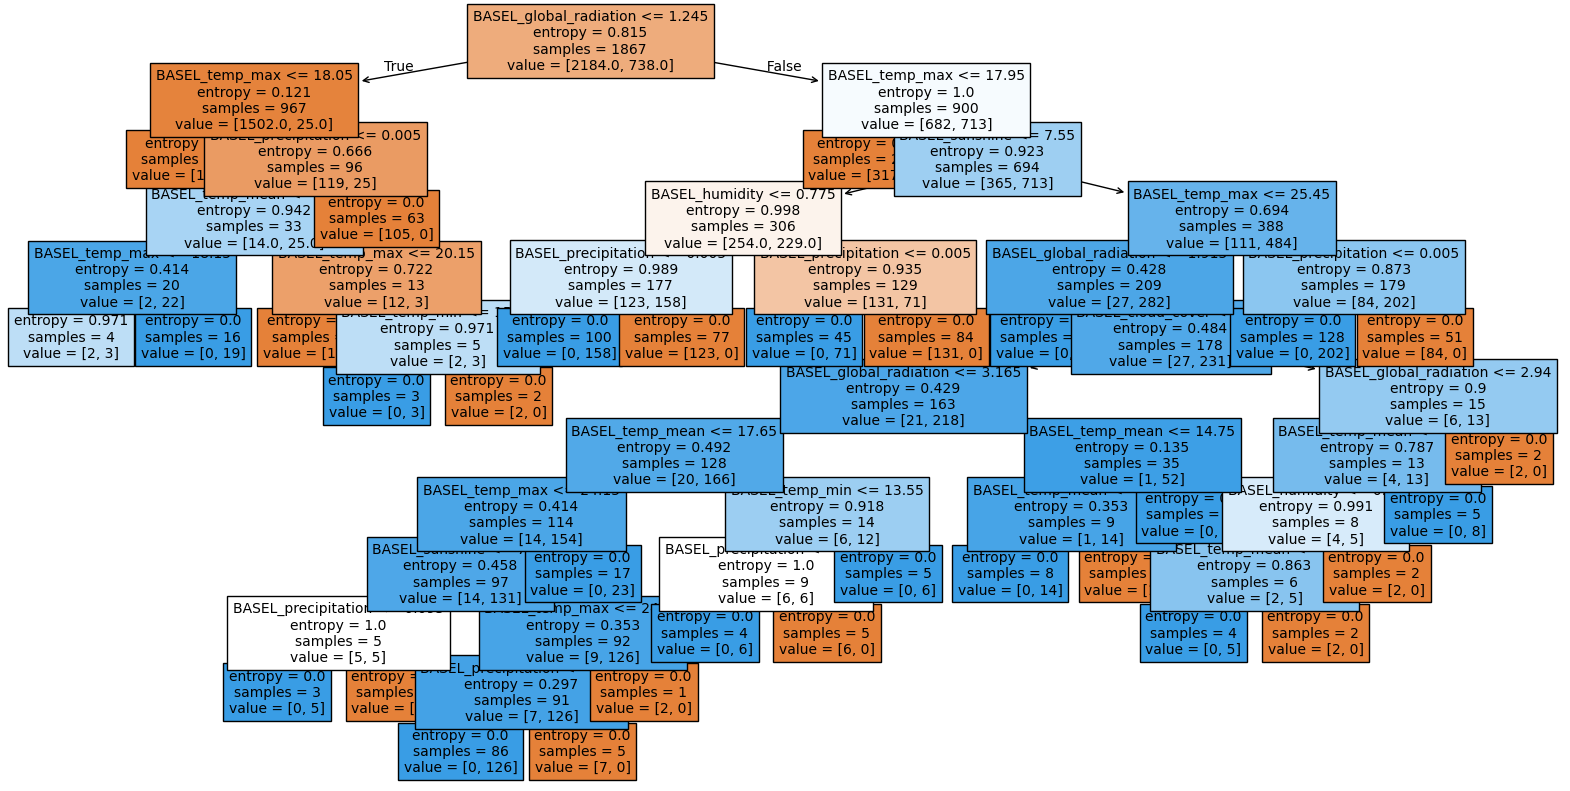

In [80]:
# plot and save a decsiion tree from optimised model
plt.figure(figsize=(20,10))
plot_tree(rand_search_single.best_estimator_.estimators_[0],
          feature_names=X_single.columns,
          filled=True, fontsize=10)

plt.savefig("optimized_tree_single_station.png", dpi=300)

---

## 9. Optimised Random Forest Evaluation
In this section, I evaluate the performance of the Random Forest models after hyperparameter tuning.

For both datasets, I compare the optimised model against the baseline model to see how much improvement tuning has achieved:
 
 1. All Weather Stations (first decade of data)
  - Assess how the tuned model performs across multiple stations over a limited timeframe.
  - Compare accuracy with the baseline and determine if tuning improves prediction.
 
 2. Single Weather Station (Basel, full timeline)
  - Evaluate the tuned model for a single station over the entire dataset.
  - Compare with its baseline to understand the benefit of hyperparameter optimisation for one location.

 This section provides insights into the impact of tuning on predictive accuracy for both multi-station and single-station scenarios.

### All Weather Stations and Only One Decade

In [81]:
# Predict on the test set using the optimised Random Forest
y_pred_optimized = rand_search.predict(X_test)

In [82]:
# Calculate and print the accuracy of the optimised model
optimized_accuracy = metrics.accuracy_score(y_test, y_pred_optimized)
print("Optimized Accuracy:", optimized_accuracy)

Optimized Accuracy: 0.5649794801641587


In [83]:
# Compare with baseline accuracy
baseline_accuracy = metrics.accuracy_score(y_test, y_pred_base)
print("Baseline Accuracy:", baseline_accuracy)

Baseline Accuracy: 0.6019151846785226


In [84]:
if optimized_accuracy > baseline_accuracy:
    print("Hyperparameter tuning improved the model!")
elif optimized_accuracy == baseline_accuracy:
    print("No improvement after hyperparameter tuning.")
else:
    print("Optimized model performed worse than baseline.")

Optimized model performed worse than baseline.


### Single-Station Full Timeline Dataset

In [85]:
# Predict on the test set using the optimised Random Forest for Basel
y_pred_optimized_single = rand_search_single.predict(X_test_single)

In [86]:
# Calculate and print the accuracy of the optimised model
optimized_accuracy_single = metrics.accuracy_score(y_test_single, y_pred_optimized_single)
print("Optimized Accuracy (Basel):", optimized_accuracy_single)

Optimized Accuracy (Basel): 0.9986320109439124


In [87]:
# Compare with baseline accuracy for Basel
baseline_accuracy_single = metrics.accuracy_score(y_test_single, rf_base_single.predict(X_test_single))
print("Baseline Accuracy (Basel):", baseline_accuracy_single)

Baseline Accuracy (Basel): 1.0


In [88]:
if optimized_accuracy_single > baseline_accuracy_single:
    print("Hyperparameter tuning improved the Basel model!")
elif optimized_accuracy_single == baseline_accuracy_single:
    print("No improvement after hyperparameter tuning for Basel.")
else:
    print("Optimized Basel model performed worse than baseline.")

Optimized Basel model performed worse than baseline.


---

# 10. Feature Importance from Optimised Models
In this section, I examine which features contributed most to the predictions in my optimised Random Forest models. Feature importance provides insight into which weather variables have the strongest impact on predicting “pleasant” days. 

I consider two scenarios:
 1. All Weather Stations (first decade of data)
  - Identify the most influential variables across multiple stations.
  - Visualise the top features to better understand which factors drive model predictions.

 2. Single Weather Station (Basel, full timeline)
  - Determine which features are most important for predicting pleasant weather at one station over the entire dataset.
  - Compare the feature importances with the multi-station model to see differences in variable influence.

 This analysis helps highlight which weather measurements are most critical for accurate predictions in both broad and focused datasets.

### All Weather Stations and Only One Decade

In [89]:
# Extract feature importances
importances = rand_search.best_estimator_.feature_importances_

In [90]:
# Create a DataFrame for easy viewing
feature_importances = pd.DataFrame({
    'Feature': X.columns,
    'Importance': importances
})

# Sort features by importance
feature_importances = feature_importances.sort_values(by='Importance', ascending=False)

In [91]:
# Display top features
print("\nTop features by importance:")
print(feature_importances.head(10))


Top features by importance:
                 Feature  Importance
44   DUSSELDORF_temp_max    0.038398
8         BASEL_temp_max    0.029655
94    MUNCHENB_temp_mean    0.027525
35       DEBILT_temp_max    0.026268
79   MAASTRICHT_temp_max    0.024325
26     BUDAPEST_temp_max    0.022992
51    HEATHROW_temp_mean    0.022041
6        BASEL_temp_mean    0.021165
88       MADRID_temp_max    0.020458
42  DUSSELDORF_temp_mean    0.020029


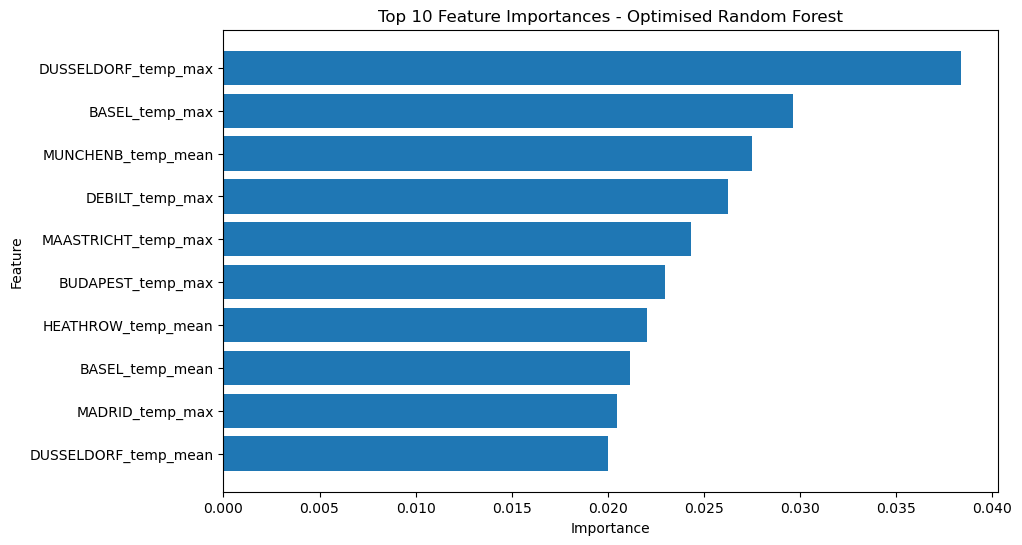

In [92]:
# Visualise feature importances
plt.figure(figsize=(10,6))
plt.barh(feature_importances['Feature'][:10][::-1], feature_importances['Importance'][:10][::-1])
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.title("Top 10 Feature Importances - Optimised Random Forest")
plt.show()

### Single-Station Full Timeline Dataset

In [93]:
# Extract feature importances
importances_single = rand_search_single.best_estimator_.feature_importances_

In [94]:
# Create a DataFrame for easy viewing
feature_importances_single = pd.DataFrame({
    'Feature': X_single.columns,
    'Importance': importances_single
})

In [95]:
# Sort features by importance
feature_importances_single = feature_importances_single.sort_values(by='Importance', ascending=False)

In [96]:
# Display top features
print("\nTop features by importance (Basel):")
print(feature_importances_single.head(10))


Top features by importance (Basel):
                  Feature  Importance
4     BASEL_precipitation    0.343211
8          BASEL_temp_max    0.329514
6         BASEL_temp_mean    0.098084
3  BASEL_global_radiation    0.092981
5          BASEL_sunshine    0.068164
7          BASEL_temp_min    0.034386
0       BASEL_cloud_cover    0.026724
1          BASEL_humidity    0.006937
2          BASEL_pressure    0.000000


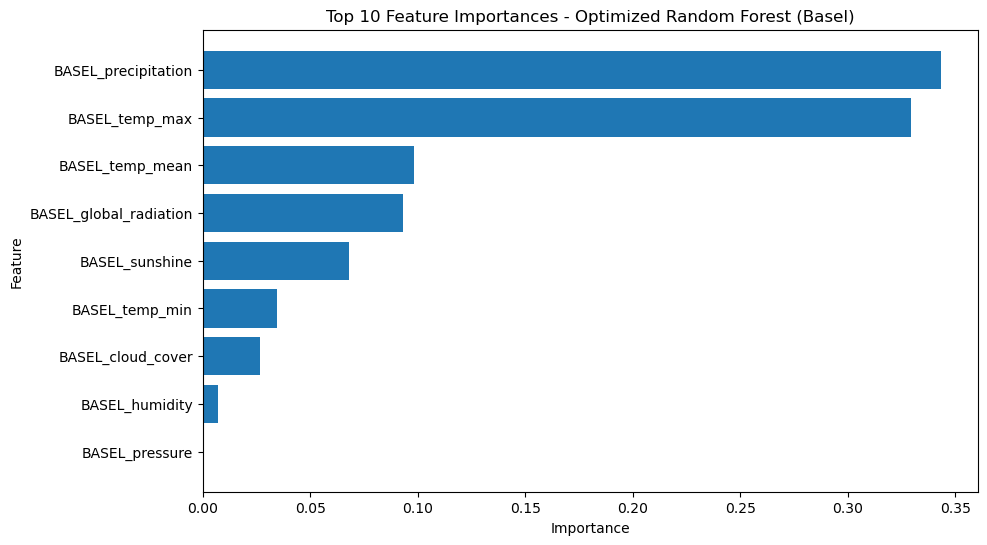

In [97]:
# Visualise feature importances
plt.figure(figsize=(10,6))
plt.barh(feature_importances_single['Feature'][:10][::-1], feature_importances_single['Importance'][:10][::-1])
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.title("Top 10 Feature Importances - Optimized Random Forest (Basel)")
plt.show()